In [135]:
#!pip install autokeras

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os,shutil
import pandas as pd
import keras
from keras.layers import *
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#import autokeras as ak
#from autokeras import StructuredDataClassifier
#from tensorflow.keras.models import Sequential, model_from_json


In [140]:
path="/home/urvashiarora3195/Capstone_project/Control_400/three-one"
train=os.listdir(path)
print(train)
print("Training Data:- ")
for f in train:
  path1= path+"/" +f
  print(f+ " "+ str(len(os.listdir(path))))

['Third_400', 'First_400']
Training Data:- 
Third_400 2
First_400 2


In [141]:
from keras.utils import load_img, img_to_array
path1="/home/urvashiarora3195/Capstone_project/Control_400/three-one"
train=os.listdir(path1)
print(train)
image_data_train=[]
label_train=[]
for f in train:
  path="/home/urvashiarora3195/Capstone_project/Control_400/three-one/"+f+'/'
  entries=os.listdir(path)
  for entry in entries:
      if f=='First_400':
        label=0
      else:
        label=1
      image=load_img(path+entry,target_size=(224,224,1))
      image_array=np.reshape(np.average((img_to_array(image)/255.0), axis=2), (224,224,1))
      image_data_train.append(image_array)
      label_train.append(label)

image_data_train=np.array(image_data_train)
label_train=np.array(label_train)

print(image_data_train.shape)

['Third_400', 'First_400']
(800, 224, 224, 1)


In [142]:
x_train, X_test, y1_train, y_test = train_test_split(image_data_train, label_train, test_size=0.1, random_state=40)
print(x_train.shape, X_test.shape, y1_train.shape, y_test.shape)

(720, 224, 224, 1) (80, 224, 224, 1) (720,) (80,)


In [143]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y1_train, test_size=0.1111, random_state=38)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(640, 224, 224, 1) (80, 224, 224, 1) (640,) (80,)


In [144]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)


In [145]:
train_data = datagen.fit(X_train)

In [146]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import InputLayer
from sklearn.utils import class_weight
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

In [153]:
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(224,224,1), dtype = "float32"),
  tf.keras.layers.Normalization(axis=-1, mean=None, variance=None),
  tf.keras.layers.Conv2D(32, kernel_size=(2,2), kernel_regularizer=tf.keras.regularizers.L1(0.1), strides=(1, 1), activation="ReLU"),
  #tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1, 1), activation="ReLU"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'),
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.9),
  tf.keras.layers.Dense(1,activation="sigmoid")])



In [154]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy',metrics = ['acc'])

In [155]:
hist = model.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=50, shuffle =True)

Epoch 1/50
20/20 [==============================] - 95s 4s/step - loss: 0.8965 - acc: 0.5094 - val_loss: 0.7844 - val_acc: 0.6625
Epoch 2/50
20/20 [==============================] - 88s 4s/step - loss: 0.7903 - acc: 0.5703 - val_loss: 0.7704 - val_acc: 0.6625
Epoch 3/50
20/20 [==============================] - 88s 4s/step - loss: 0.7582 - acc: 0.6156 - val_loss: 0.7205 - val_acc: 0.6750
Epoch 4/50
20/20 [==============================] - 88s 4s/step - loss: 0.7360 - acc: 0.6281 - val_loss: 0.6997 - val_acc: 0.6500
Epoch 5/50
20/20 [==============================] - 88s 4s/step - loss: 0.6880 - acc: 0.6516 - val_loss: 0.6502 - val_acc: 0.6875
Epoch 6/50
20/20 [==============================] - 88s 4s/step - loss: 0.6684 - acc: 0.6797 - val_loss: 0.6347 - val_acc: 0.6625
Epoch 7/50
20/20 [==============================] - 88s 4s/step - loss: 0.6594 - acc: 0.7016 - val_loss: 0.6299 - val_acc: 0.6875
Epoch 8/50
20/20 [==============================] - 88s 4s/step - loss: 0.6245 - acc: 0.72

In [156]:
df = pd.DataFrame({'loss' : hist.history["loss"],
                                'val_loss' : hist.history["val_loss"],
                                'accuracy' : hist.history["acc"],
                               "val_accuracy": hist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('/home/urvashiarora3195/Capstone_project/result/hist_13.csv')

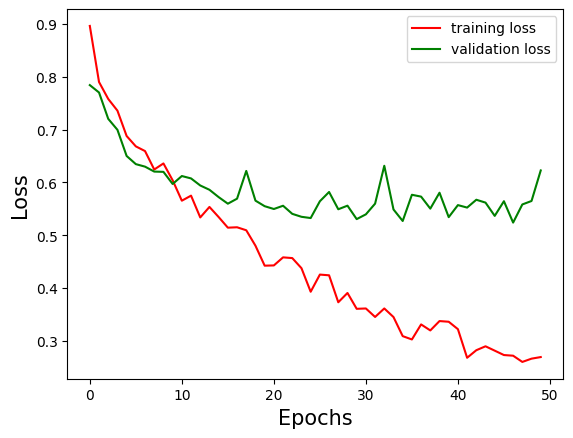

In [157]:
#plt.style.use("seaborn")
plt.plot(hist.history['loss'],label="training loss",c='red')
plt.plot(hist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
#plt.ylim(1,4.5)
plt.savefig("/home/urvashiarora3195/Capstone_project/result/loss_13.jpg")

plt.legend()
plt.show()

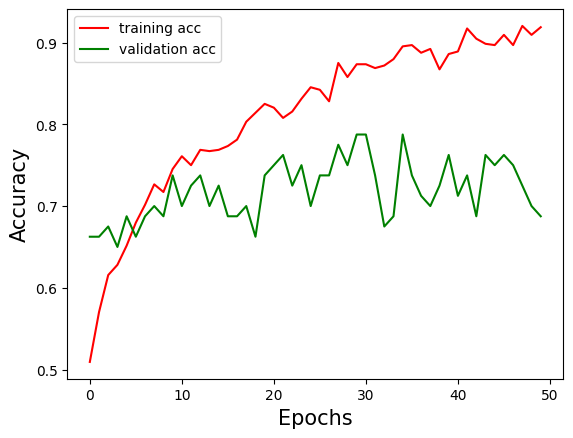

In [158]:
#plt.style.use("seaborn")
plt.plot(hist.history['acc'],label="training acc",c='red')
plt.plot(hist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.savefig("/home/urvashiarora3195/Capstone_project/result/acc_13.jpg")
plt.legend()
plt.show()

3/3 [==============================] - 2s 394ms/step
confusion Matrix:
[[23 15]
 [ 8 34]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

        Case       0.74      0.61      0.67        38
     Control       0.69      0.81      0.75        42

    accuracy                           0.71        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80

**********************************************
Accuracy Score : 0.7125
**********************************************
F1 Score : 0.7472527472527472
**********************************************
Class Wise Accuracy :
Third : 60.526315789473685
First : 80.95238095238095
**********************************************
ROC_AUC Score: 0.7073934837092732
**********************************************
Cohen_kappa score: 0.4184576485461441


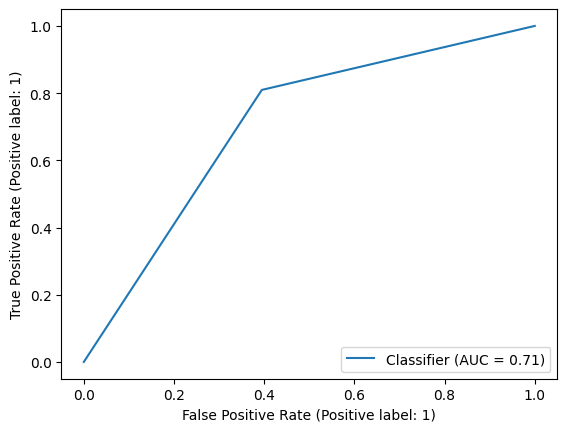

In [159]:

Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Case','Control'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Third :", class_wise_acc[0]*100)
print("First :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)


In [ ]:
model.summary()


In [ ]:
#import pickle

In [ ]:
#pickle.dump(model, open('model12.pkl','wb'))


In [ ]:
#import torch
#path = F"/content/drive/model_baseline.pt"
#torch.save(model.state_dict(), path)

In [ ]:
# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
 #   json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")

In [ ]:
a = len(X_train)

In [ ]:
#X_train.reshape(435*224*224*3)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X = pca.fit_transform(X_train.reshape(a,224*224*1))

In [ ]:
X

In [ ]:
def animate(num, data, line):
   colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',   '#7f7f7f', '#bcbd22', '#17becf']
   line.set_color(colors[num % len(colors)])
   line.set_alpha(0.7)
   line.set_data(data[0:2, :num])
   line.set_3d_properties(data[2, :num])
   return line

In [ ]:
def plot_3d_space(X, y, label='Classes'):   
    colors = ["orange", "red"]
    markers = ['o', 'o']
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    label = ["Third", "First"]
    for l, c, m in zip(np.unique(y), colors, markers):

        line = ax.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=label[l], marker=m
        )
    
    plt.legend(loc='upper right')
    plt.show()

In [ ]:

import matplotlib.animation as animation
plot_3d_space(X, y_train, 'Imbalanced dataset(3 PCA components)')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x = X[:,0],y = X[:,1] ,z = X[:,2],color = y_train)
fig.update_traces(marker_size=3)
fig.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=3, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X_train.reshape(a,224*224*1))
X_embedded.shape


In [ ]:
plot_3d_space(X_embedded, y_train, label='Class')

In [ ]:
X_embedded

In [ ]:
file = np.column_stack((X_embedded,y_train))
np.savetxt("X_train.csv", file)


In [ ]:
color = ['blue', 'orange']

In [ ]:

import plotly.express as px
fig = px.scatter_3d(X_embedded, x = X_embedded[:,0],y = X_embedded[:,1] ,z = X_embedded[:,2],color = y_train)
fig.update_traces(marker_size=3)
fig.show()
     